<a href="https://colab.research.google.com/github/Praveen3ravi/Machine_Learning/blob/main/Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Simple Linear Regresion**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('student_scores.csv') #read the dataset

In [ ]:
dataset.shape
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


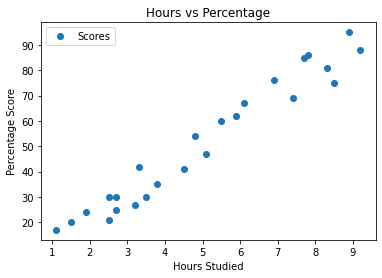

In [ ]:
dataset.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

In [ ]:
dataset.Hours.values

array([2.5, 5.1, 3.2, 8.5, 3.5, 1.5, 9.2, 5.5, 8.3, 2.7, 7.7, 5.9, 4.5,
       3.3, 1.1, 8.9, 2.5, 1.9, 6.1, 7.4, 2.7, 4.8, 3.8, 6.9, 7.8])

# Preparing the data

In [ ]:
X = dataset.iloc[:, :-1].values # features as arrays
y = dataset.iloc[:, 1].values # target as arrays
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
X_train.shape, X_test.shape

((20, 1), (5, 1))

# Modelling

In [ ]:
from sklearn.linear_model import LinearRegression #importing all the required functions
regressor = LinearRegression(normalize=True, fit_intercept = True) #initialise my Linear Regression predictedScore = m * Hours + c
"Symtax : varName = ModelName(modelHyperParams)"
regressor.fit(X_train, y_train) #Learning happens - GD is done and we get the final values of m and c

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [ ]:
print(regressor.intercept_) # c

2.018160041434662


In [ ]:
print(regressor.coef_) # the final learnt model is predictedScore = 9.91 * hoursStudied + 2.01
#If a student studies for 5 hours => predictedScore = 9.91 * 5 + 2.01 = 51.06

[9.91065648]


In [ ]:
y_pred = regressor.predict(X_test) # given the features of the test dataset, it will give the final predictions
"Syntax : varName.predict(test_features)"
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [ ]:
regressor.predict([[24]]) # perils of extrapolation

array([239.87391558])

# Metrics

In [ ]:
from sklearn import metrics 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
R2- SCORE: 0.9454906892105354


# Custom Loss Function

In [ ]:
# beta = np.array([2])
# np.square(beta)
# print(X)
# np.matmul(X,beta)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


array([ 5. , 10.2,  6.4, 17. ,  7. ,  3. , 18.4, 11. , 16.6,  5.4, 15.4,
       11.8,  9. ,  6.6,  2.2, 17.8,  5. ,  3.8, 12.2, 14.8,  5.4,  9.6,
        7.6, 13.8, 15.6])

In [ ]:
from scipy.optimize import minimize

#scorePredicted = m * hoursStudied, MAE beta - >params to learn
# np.matmul(X,beta) = (m^2) * hoursStudies # predicted
# mae = mean(abs(predicted - trueVal))
# np.square(beta)

#I am trying to find the value of m (beta) that minimises my below loss function
def objective_function(beta, X, Y): #Loss Function
    error = np.mean(np.abs(np.matmul(X,np.square(beta)) - Y)) # average of absolute value of (predicted - trueLabel)
    return(error)

# You must provide a starting point at which to initialize
# the parameter search space
beta_init = np.array([0.6]) # initiate the model with a random value
result = minimize(objective_function, beta_init, args=(X_train,y_train),
                  method='BFGS', options={'maxiter': 500}) #syntax for doing gradient descent

# result
# The optimal values for the input parameters are stored
# in result.x
beta_hat = result.x # score = 10.6 * hoursStudies
print(beta_hat)

[3.26713288]


In [ ]:
from scipy.optimize import minimize
# y = mx + c 
def objective_function(beta, X, Y):
    b = np.ones((X.shape[0],X.shape[1]+1))
    b[:,:-1] = X
    error = np.mean(np.abs(np.matmul(b,beta) - Y))
    return(error)

# You must provide a starting point at which to initialize
# the parameter search space
beta_init = np.array([1,1])
result = minimize(objective_function, beta_init, args=(X_train,y_train),
                  method='BFGS', options={'maxiter': 500})

# The optimal values for the input parameters are stored
# in result.x
beta_hat = result.x
print(beta_hat)

[10.35920379  2.8030862 ]


# **Effect of Outlier**

In [ ]:
X_train_outlier = np.vstack([X_train,[24]])
y_train_outlier = np.append(y_train,95)

#plt.scatter(X_train_outlier, y_train_outlier)



regressor = LinearRegression(normalize=True)
regressor.fit(X_train_outlier, y_train_outlier)
y_pred = regressor.predict(X_test)
# print(y_pred)
# print(y_test)
# print(regressor.coef_[0],regressor.intercept_)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 11.537854277908341
Mean Squared Error: 149.21264269436432
Root Mean Squared Error: 12.215262694447643


In [ ]:
from scipy.optimize import minimize

def objective_function(beta, X, Y):
    b = np.ones((X.shape[0],X.shape[1]+1))
    b[:,:-1] = X
    error = np.mean(np.abs(np.matmul(b,beta) - Y))
    return(error)

# You must provide a starting point at which to initialize
# the parameter search space
beta_init = np.array([1]*(X_train.shape[1] + 1))
result = minimize(objective_function, beta_init, args=(X_train_outlier,y_train_outlier),
                  method='BFGS', options={'maxiter': 500})

# The optimal values for the input parameters are stored
# in result.x
beta_hat = result.x
print(beta_hat)

[8.76549714 7.35742627]


# **Multiple Linear Regression**

In [ ]:
dataset = pd.read_csv('petrol_consumption.csv')

In [ ]:
#dataset.head()
dataset.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


# Preparing data

In [ ]:
X = dataset[['Petrol_tax', 'Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)']].values #array of features
y = dataset['Petrol_Consumption'].values #array of targets

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler ## standrard scalig 
scaler = StandardScaler() #initialise to a variable
X_train_scaled = scaler.fit_transform(X_train,y_train) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test) # transform the test data 

# **EDA**

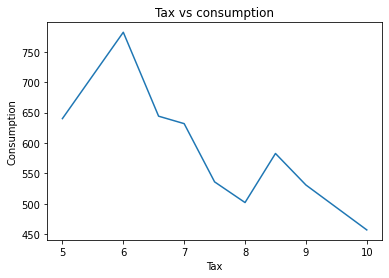

In [ ]:
dataset.groupby('Petrol_tax')['Petrol_Consumption'].mean().plot()
#dataset.plot(x='Petrol_tax', y='Petrol_Consumption', style='o')
plt.title('Tax vs consumption')
plt.xlabel('Tax')
plt.ylabel('Consumption')
plt.show()

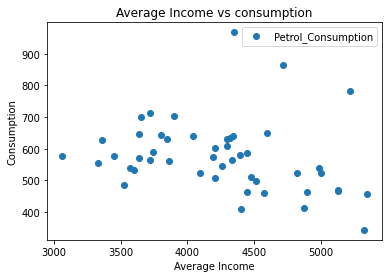

In [ ]:
dataset.plot(x='Average_income', y='Petrol_Consumption', style='o')
plt.title('Average Income vs consumption')
plt.xlabel('Average Income')
plt.ylabel('Consumption')
plt.show()

# Model training

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(normalize = True)
regressor.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [ ]:
coeff_df = pd.DataFrame(regressor.coef_,['Petrol_tax', 'Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)'], columns=['Coefficient'])
y_pred = regressor.predict(X_test_scaled)
coeff_df


,Coefficient
Petrol_tax,-40.366480
Average_income,-35.121088
Paved_Highways,-17.589400
Population_Driver_licence(%),75.691689


In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,534,469.391989
1,410,545.645464
2,577,589.668394
3,571,569.730413
4,577,649.774809
5,704,646.631164
6,487,511.608148
7,587,672.475177
8,467,502.074782
9,580,501.270734


In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 56.82224747896471
Mean Squared Error: 4666.344787588368
R2- SCORE: 0.20361932410121653


# Feature Selection

# RFE

In [ ]:
from sklearn.feature_selection import RFE
estimator = LinearRegression(normalize = True)
selector = RFE(estimator, n_features_to_select=2, step=1, )
selector = selector.fit(X, y)
list(zip(X.columns,selector.support_))

# Sequential Feature selection

In [ ]:
!pip install scikit-learn==0.24.2

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
estimator = LinearRegression(normalize = True)
sfs = SequentialFeatureSelector(estimator, n_features_to_select=2)
sfs.fit(X, y)
print(list(zip(X.columns,sfs.get_support())))

In [ ]:
X_trans = sfs.transform(X)
X_trans # feature selection

# Cross Validation

In [ ]:
from sklearn.model_selection import cross_validate
regressor = LinearRegression(normalize = True)

In [ ]:
cv_results = cross_validate(regressor, X, y, cv=10, scoring = "r2" , return_train_score=True)
cv_results['test_score'].mean(), cv_results['train_score'].mean()


# **Ridge Regression**

In [ ]:
from sklearn.linear_model import Lasso
for alpha in [0.001,0.002,0.003,0.005,0.01]:
  regressor = Ridge(normalize=True,alpha = alpha)
  cv_results = cross_validate(regressor, X, y, cv=10, scoring = "neg_mean_squared_error" , return_train_score=True)
  print("Alpha : ", alpha, -cv_results['test_score'].mean(), -cv_results['train_score'].mean())

